# Deep Neural Network Model using MNIST Handwritten Digits Dataset

# MNIST Handwritten Digits Dataset
<p style='font-size:20px; line-height:30px'>The Modified National Institude of Standards and Technology (MNIST) dataset for handwritten digits is a widely used dataset which contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model. It was introduced in 1998 and has become a standard benchmark for many classification tasks.</p>

# Objectives

- To develop a machine learning model using a deep neural network architecture
- Use the MNIST Handwritten dataset to train the model
- Do a perfomance analysis on the Deep Neural Network model
- Use the developed model to make predictions
- Save model and deploy using personal handwritten digits

# MNIST Handwritten Digits Dataset

<h3 style="color:red">Read more on the MNIST Handwritten Digits Dataset</h3>

[Link to MNIST Handwritten Digits Dataset](https://www.tensorflow.org/datasets/catalog/mnist)


In [181]:
# Import Libraries --- [keras, sklearn, numpy, pandas, tensorflow, matplotlib]
import keras
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [182]:
# Load MNIST Handwritten Digits Dataset
dataset = tf.keras.datasets.mnist

In [183]:
# Split Data into Trainig and Testing Parts
(x_train, y_train),(x_test, y_test) = dataset.load_data()

In [184]:
# Inspect Data [shape, ndim]

In [185]:
x_train.shape

(60000, 28, 28)

In [186]:
y_train.shape

(60000,)

In [187]:
x_test.shape

(10000, 28, 28)

In [188]:
y_test.shape

(10000,)

# How Images are formed

### 1.  Images are formed when white light reflects off an object onto a film

![imagespec](imagespec.jpg)

### 2. The visibility range; in retrospect, is the white light range made of the 7 rainbow colours [Red, Orange, Yellow, Green, Blue, Indigo and Violet]

### 3. In a digital representation, images are basically a grid made up of a combination of colours 


![gridimage](grid.jpg)

### 4.  Each grid is a pixel made up of colours [ Note: a combination of the primary colours can generate any other colour]

![gridimage2](pixel.jpg)

### 5.  In Computer Vision, the RGB (Red, Green, Blue) colour ratio is used

### 6.  Each pixel is a combination of the intensity of the RGB ratio ranging from 0 - 255

### 7.  Colours in terms of RGB ratio 
- RED =    (255, 0, 0)
- GREEN =  (0, 255, 0)
- BLUE =   (0, 0, 255)
- YELLOW = (255, 255, 0)
- BLACK = (0, 0, 0)
- WHITE = (255, 255, 255)

In [189]:
# show image
x_train[0].shape

(28, 28)

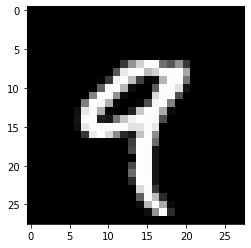

In [190]:
plt.imshow(x_train[4], cmap='gray')

In [191]:
y_train[4]

9

In [192]:
# Show unique Training Labels [Classes]
classes_labels = np.unique(y_train)
classes_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [193]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [194]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [195]:
# Show Images and their corresponding Labels


In [196]:
# Build Deep Neural Network Model
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [197]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [198]:
# Check Model Summary
# model.summary()

In [199]:
# Check Initial Weights
# model.get_weights()

In [200]:
# Compile Model 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [201]:
# Fit Model
model.fit(x_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2514 - accuracy: 0.9259
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1043 - accuracy: 0.9686
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0747 - accuracy: 0.9768
Epoch 4/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0551 - accuracy: 0.9828
Epoch 5/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0477 - accuracy: 0.9847
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9884
Epoch 7/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0327 - accuracy: 0.9894


In [202]:
model.history.history

{'loss': [0.2514283359050751,
  0.1042877584695816,
  0.07473405450582504,
  0.055084630846977234,
  0.04765300825238228,
  0.03743364289402962,
  0.032667625695466995],
 'accuracy': [0.9259166717529297,
  0.9685666561126709,
  0.9768499732017517,
  0.9828333258628845,
  0.9846500158309937,
  0.9884333610534668,
  0.9893500208854675]}

In [203]:
# Check Final Weights

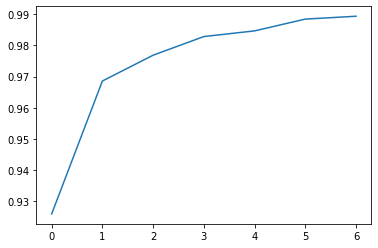

In [204]:
# Plot Accuracy and Loss
plt.plot(model.history.history['accuracy'])
plt.show()

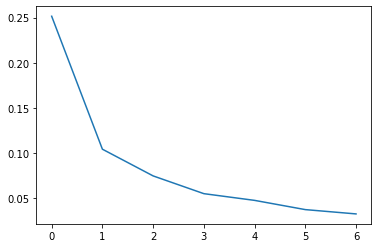

In [205]:
plt.plot(model.history.history['loss'])
plt.show()

In [206]:
# Evaluate Model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9755


[0.09995999932289124, 0.9754999876022339]

In [228]:
# Make Predictions with Test Part of Dataset
myprediction = model.predict(x_test)

In [276]:
myprediction[500]

array([1.6184472e-17, 3.6234735e-16, 3.6867290e-10, 1.0000000e+00,
       4.0643609e-14, 2.9680453e-12, 1.2772158e-22, 8.2262227e-14,
       6.6692230e-14, 9.2922310e-09], dtype=float32)

In [277]:
for i in range(0, len(myprediction[500])):
    prediction = myprediction[500][i]
    print(f'{classes_labels[i]} - {prediction:.5%}')

0 - 0.00000%
1 - 0.00000%
2 - 0.00000%
3 - 100.00000%
4 - 0.00000%
5 - 0.00000%
6 - 0.00000%
7 - 0.00000%
8 - 0.00000%
9 - 0.00000%


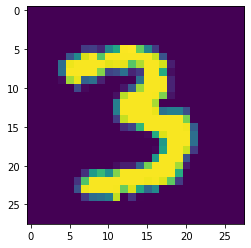

In [278]:
plt.imshow(x_test[500])

In [211]:
model.save('savedmodel.h5')